<a href="https://colab.research.google.com/github/mananjp/HR_and_Payroll_EDA/blob/main/hr_and_payroll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/hr_and_payroll.csv")
df.head()

,#empl0yee_id#,fir$t_name,l@st_name,depart_ment,job_t1tle,hire_date,salary$,performance_scor.e,leave_bal_days,recruitment_source!,time2hire_dayz,benefits_u$ed,last_perf_review,last_salary_bump,bonus_pct
0,1,Megan,Johnson,I.T.,S0ftware_Eng,2023-05-27,45567.00,Good,NaN,Company_Site,29.7,HlthIns,2024-06-18,2022-07-02,0
1,2,Katherine,Bailey,Finance,S@les_Manag3r,2022-04-01,104385.00,Average,NaN,Company_Site,41.4,Ret.Plan,2023-01-07,2023-09-06,20
2,3,Robert,Smith,Operati0ns,HR_Coord!,2021-11-21,103472.10,Good,24.0,LinkdIn,19.0,Paid_Off,2024-01-10,2023-08-03,18
3,4,Jonathan,Mccann,I.T.,Ops_Mng,2021-08-10,77354.70,Average,NaN,Company_Site,16.0,Paid_Off,2023-12-04,2022-11-05,4
4,5,William,Fuentes,HR,I.T. Specialist,2016-07-27,64821.75,Poor,NaN,Company_Site,39.6,Gym Mem,2024-08-09,2022-04-28,5


In [2]:
df['emp_id'] = df['#empl0yee_id#']

In [3]:
df = df.drop('#empl0yee_id#', axis=1)

In [4]:
df['f_name'] = df['fir$t_name']
df['l_name'] = df['l@st_name']
df['benefits_used'] = df['benefits_u$ed']
df['dept'] = df['depart_ment']
df['recruitment_source'] = df['recruitment_source!']
df['perfomance_score'] = df['performance_scor.e']
df['salary'] = df['salary$']
df['job_title'] = df['job_t1tle']

df = df.drop(['fir$t_name', 'l@st_name', 'job_t1tle', 'salary$', 'performance_scor.e', 'recruitment_source!', 'depart_ment', 'benefits_u$ed'], axis=1)

In [5]:
#df = df.drop('jpb_title',axis=1)

In [6]:
df.head()

,hire_date,leave_bal_days,time2hire_dayz,last_perf_review,last_salary_bump,bonus_pct,emp_id,f_name,l_name,benefits_used,dept,recruitment_source,perfomance_score,salary,job_title
0,2023-05-27,NaN,29.7,2024-06-18,2022-07-02,0,1,Megan,Johnson,HlthIns,I.T.,Company_Site,Good,45567.00,S0ftware_Eng
1,2022-04-01,NaN,41.4,2023-01-07,2023-09-06,20,2,Katherine,Bailey,Ret.Plan,Finance,Company_Site,Average,104385.00,S@les_Manag3r
2,2021-11-21,24.0,19.0,2024-01-10,2023-08-03,18,3,Robert,Smith,Paid_Off,Operati0ns,LinkdIn,Good,103472.10,HR_Coord!
3,2021-08-10,NaN,16.0,2023-12-04,2022-11-05,4,4,Jonathan,Mccann,Paid_Off,I.T.,Company_Site,Average,77354.70,Ops_Mng
4,2016-07-27,NaN,39.6,2024-08-09,2022-04-28,5,5,William,Fuentes,Gym Mem,HR,Company_Site,Poor,64821.75,I.T. Specialist


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hire_date           500 non-null    object 
 1   leave_bal_days      254 non-null    float64
 2   time2hire_dayz      500 non-null    float64
 3   last_perf_review    500 non-null    object 
 4   last_salary_bump    500 non-null    object 
 5   bonus_pct           500 non-null    int64  
 6   emp_id              500 non-null    int64  
 7   f_name              500 non-null    object 
 8   l_name              500 non-null    object 
 9   benefits_used       500 non-null    object 
 10  dept                500 non-null    object 
 11  recruitment_source  500 non-null    object 
 12  perfomance_score    500 non-null    object 
 13  salary              500 non-null    float64
 14  job_title           500 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 58.7+ K

In [8]:
df.describe()

,leave_bal_days,time2hire_dayz,bonus_pct,emp_id,salary
count,254.000000,500.000000,500.000000,500.000000,500.000000
mean,14.602362,32.885600,9.874000,250.500000,75560.397700
std,9.008305,17.275272,7.244798,144.481833,26640.067388
min,0.000000,4.500000,0.000000,1.000000,29094.700000
25%,7.000000,19.000000,4.000000,125.750000,53943.225000
50%,14.000000,31.700000,10.000000,250.500000,73030.675000
75%,22.000000,46.050000,15.250000,375.250000,96764.662500
max,30.000000,116.600000,24.000000,500.000000,171867.150000


In [9]:
df['leave_bal_days'] = df['leave_bal_days'].fillna(0)

In [10]:
df['job_title'].value_counts()

,count
job_title,
I.T. Specialist,71
Cust Support Rep,67
S0ftware_Eng,66
HR_Coord!,63
Market1ng Spec,60
Ops_Mng,60
S@les_Manag3r,59
Fin.Analyst,54


In [11]:
job_title_replacements = {
    'S0ftware_Eng': 'Software Engineer',
    'HR_Coord!': 'HR Coordinator',
    'Market1ng Spec': 'Marketing Specialist',
    'S@les_Manag3r': 'Sales Manager',
    'Ops_Mng': 'Operations Manager',
    'Cust Support Rep': 'Customer Support Representative',
    'Fin.Analyst': 'Financial Analyst',
    'I.T. Specialist': 'IT Specialist'
}
df['job_title'] = df['job_title'].replace(job_title_replacements)

In [12]:
df['dept'].value_counts()

,count
dept,
S@les,79
I.T.,73
Operati0ns,66
Customer_Support,64
HR,61
Finance,55
Eng1neering,52
Market1ng,50


In [13]:
dept_replacements = {
    'S@les': 'Sales',
    'I.T.': 'IT',
    'Operati0ns': 'Operations',
    'Eng1neering': 'Engineering',
    'Market1ng': 'Marketing'
}
df['dept'] = df['dept'].replace(dept_replacements)

In [14]:
df.head()

,hire_date,leave_bal_days,time2hire_dayz,last_perf_review,last_salary_bump,bonus_pct,emp_id,f_name,l_name,benefits_used,dept,recruitment_source,perfomance_score,salary,job_title
0,2023-05-27,0.0,29.7,2024-06-18,2022-07-02,0,1,Megan,Johnson,HlthIns,IT,Company_Site,Good,45567.00,Software Engineer
1,2022-04-01,0.0,41.4,2023-01-07,2023-09-06,20,2,Katherine,Bailey,Ret.Plan,Finance,Company_Site,Average,104385.00,Sales Manager
2,2021-11-21,24.0,19.0,2024-01-10,2023-08-03,18,3,Robert,Smith,Paid_Off,Operations,LinkdIn,Good,103472.10,HR Coordinator
3,2021-08-10,0.0,16.0,2023-12-04,2022-11-05,4,4,Jonathan,Mccann,Paid_Off,IT,Company_Site,Average,77354.70,Operations Manager
4,2016-07-27,0.0,39.6,2024-08-09,2022-04-28,5,5,William,Fuentes,Gym Mem,HR,Company_Site,Poor,64821.75,IT Specialist


In [15]:
#df['recruitment_source'].value_counts()
df['recruitment_source'] = df['recruitment_source'].replace({'Agen$y':'Agency',  'Ind33d': 'Indeed', 'LinkdIn':'Linkedin'})

In [16]:
df['hire_date'] = pd.to_datetime(df['hire_date'])
df['last_perf_review'] = pd.to_datetime(df['last_perf_review'])
df['last_salary_bump'] = pd.to_datetime(df['last_salary_bump'])

In [17]:
df.duplicated().sum()

np.int64(0)

<Axes: ylabel='count'>

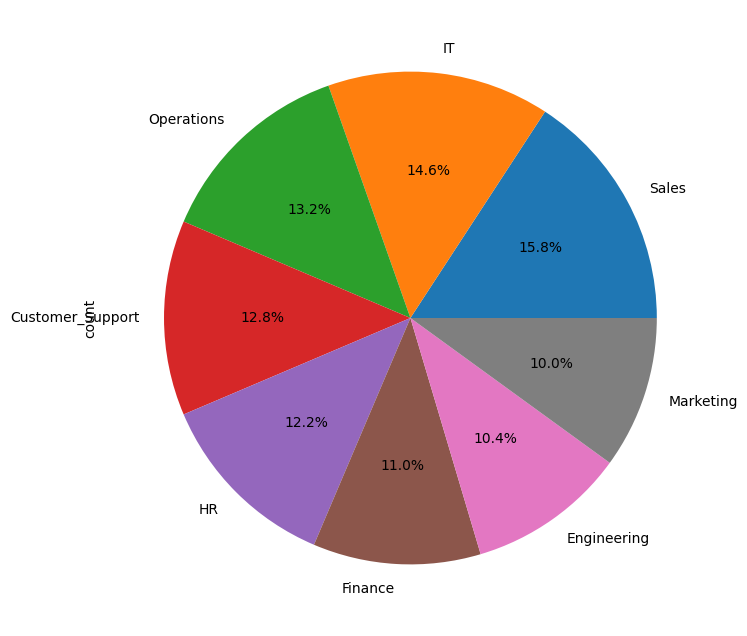

In [18]:
df['dept'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))

<Axes: ylabel='count'>

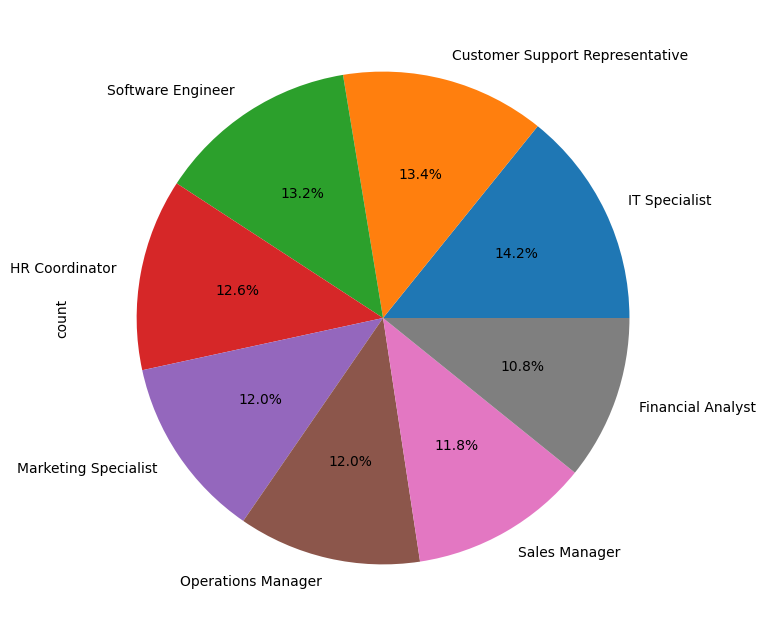

In [19]:
df['job_title'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))

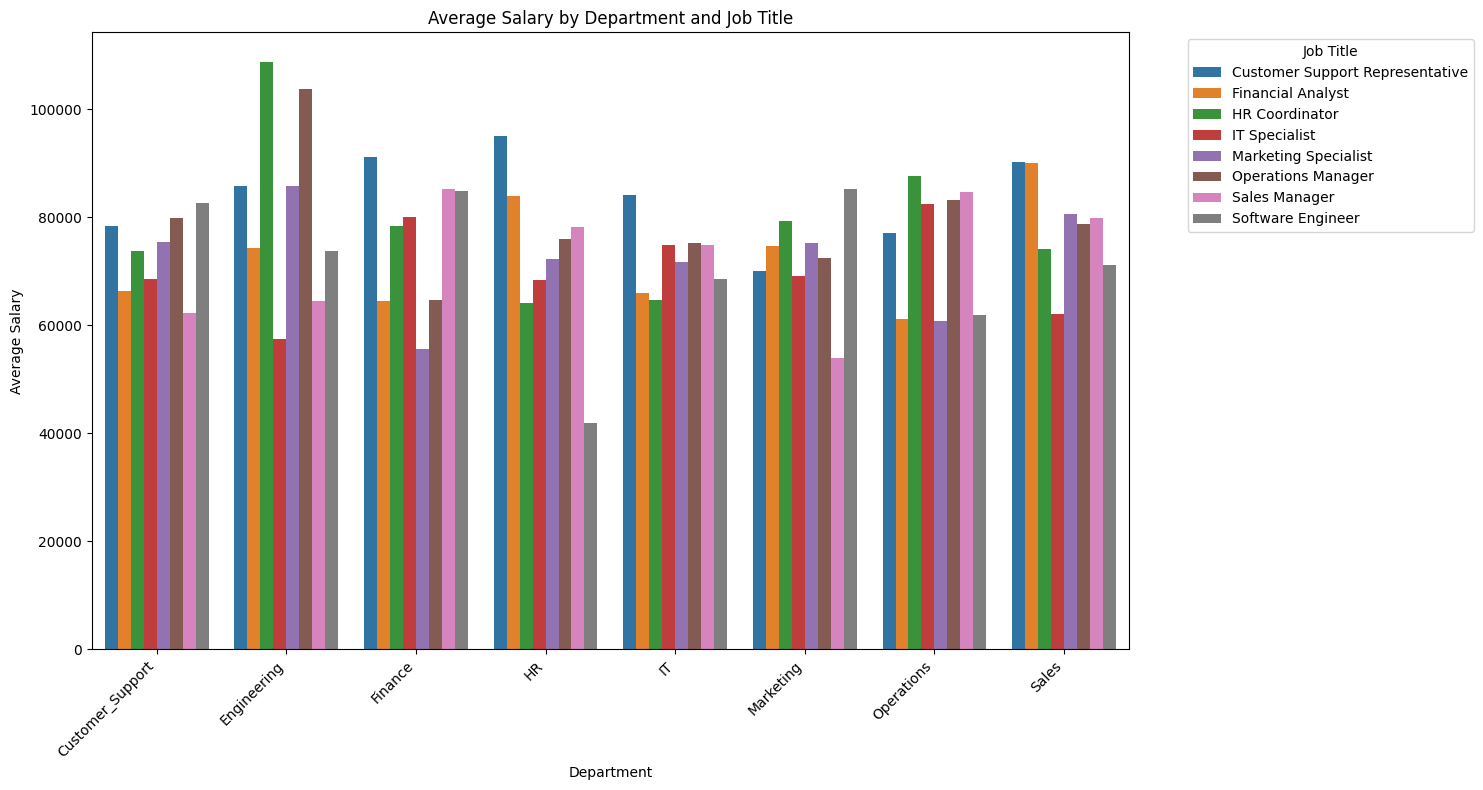

In [20]:
avg_salary_by_dept_job = df.groupby(['dept', 'job_title'])['salary'].mean().reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(data=avg_salary_by_dept_job, x='dept', y='salary', hue='job_title')
plt.title('Average Salary by Department and Job Title')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

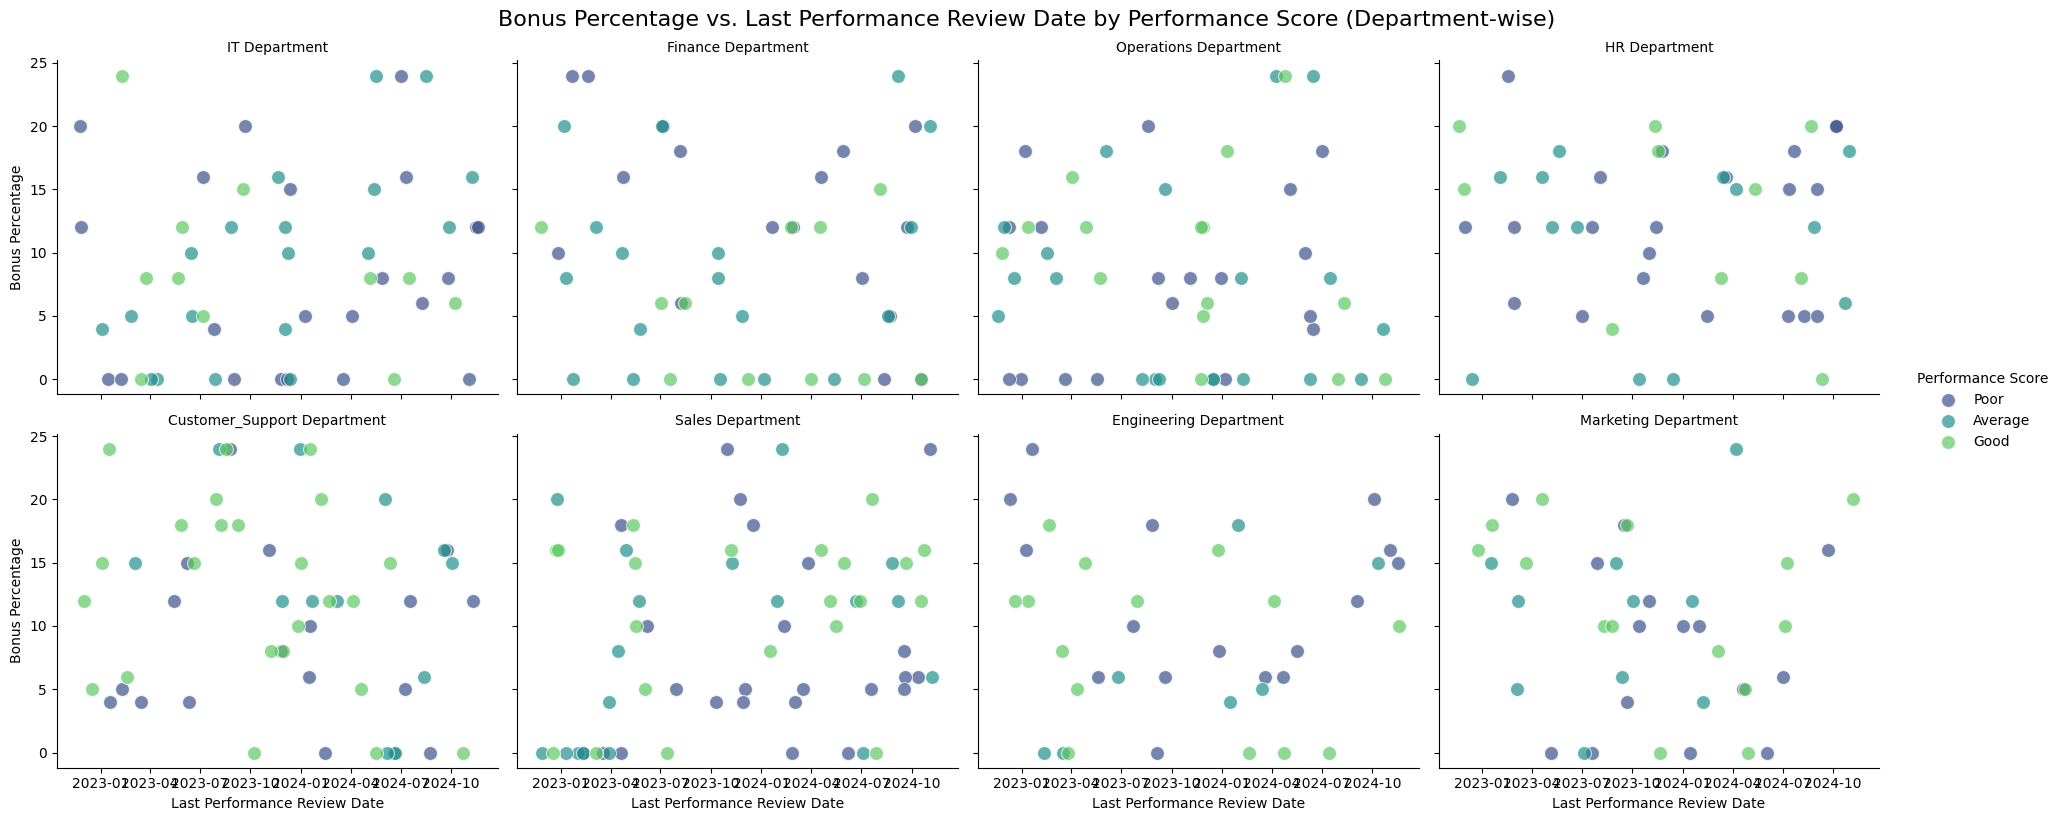

In [21]:
df['perfomance_score'] = pd.Categorical(df['perfomance_score'], categories=['Poor', 'Average', 'Good'], ordered=True)

g = sns.FacetGrid(df, col='dept', col_wrap=4, height=4, aspect=1.2, hue='perfomance_score', palette='viridis')
g.map(sns.scatterplot, 'last_perf_review', 'bonus_pct', s=100, alpha=0.7)
g.add_legend(title='Performance Score')
g.set_axis_labels('Last Performance Review Date', 'Bonus Percentage')
g.set_titles(col_template='{col_name} Department')
g.tight_layout()
plt.suptitle('Bonus Percentage vs. Last Performance Review Date by Performance Score (Department-wise)', y=1.02, fontsize=16)
plt.show()

**Reasoning**:
The subtask requires visualizing the distribution of the `bonus_pct` column using a histogram. I will use seaborn and matplotlib to create this plot, add a title, and label the axes as requested.



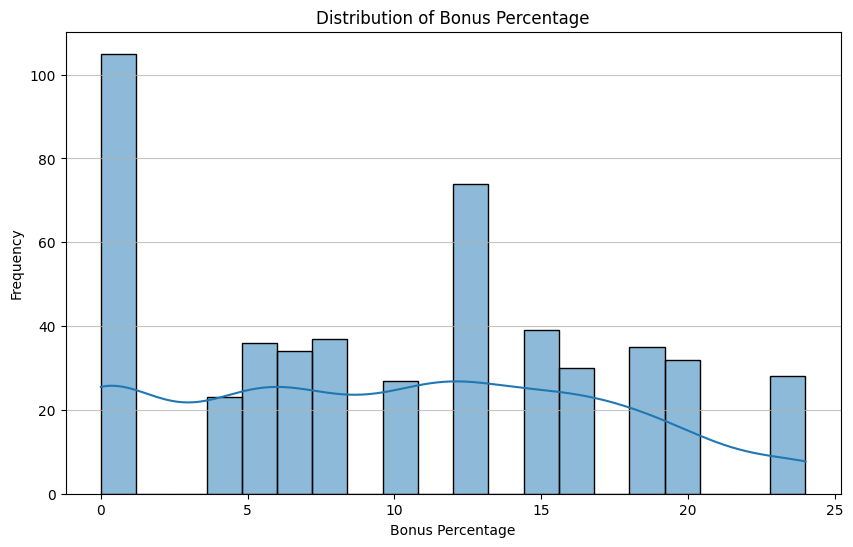

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(df['bonus_pct'], bins=20, kde=True)
plt.title('Distribution of Bonus Percentage')
plt.xlabel('Bonus Percentage')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Reasoning**:
The subtask requires visualizing the relationship between `bonus_pct` and `perfomance_score` using a box plot. I will use `seaborn.boxplot` to create the plot, setting the appropriate axes, title, and labels.



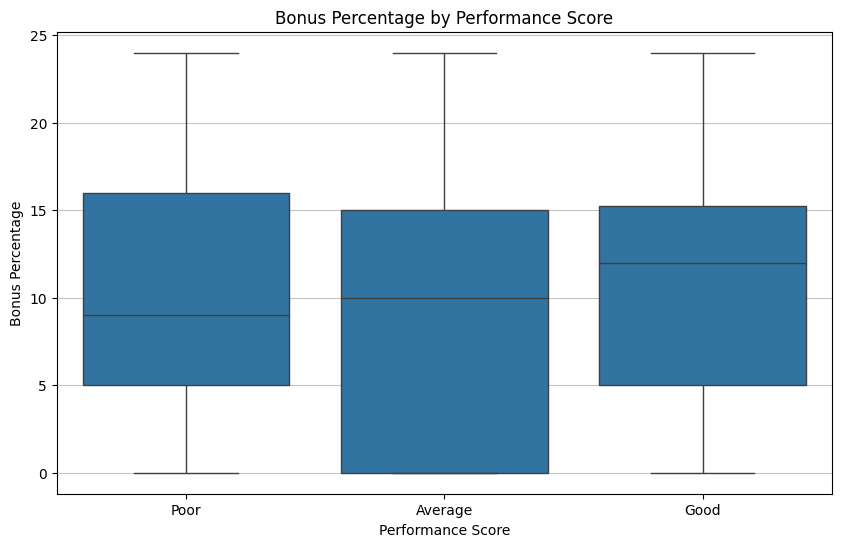

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='perfomance_score', y='bonus_pct')
plt.title('Bonus Percentage by Performance Score')
plt.xlabel('Performance Score')
plt.ylabel('Bonus Percentage')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Reasoning**:
The next step is to examine the relationship between `bonus_pct` and `salary`. A scatter plot is a suitable visualization for two numerical variables to identify any correlation or patterns.



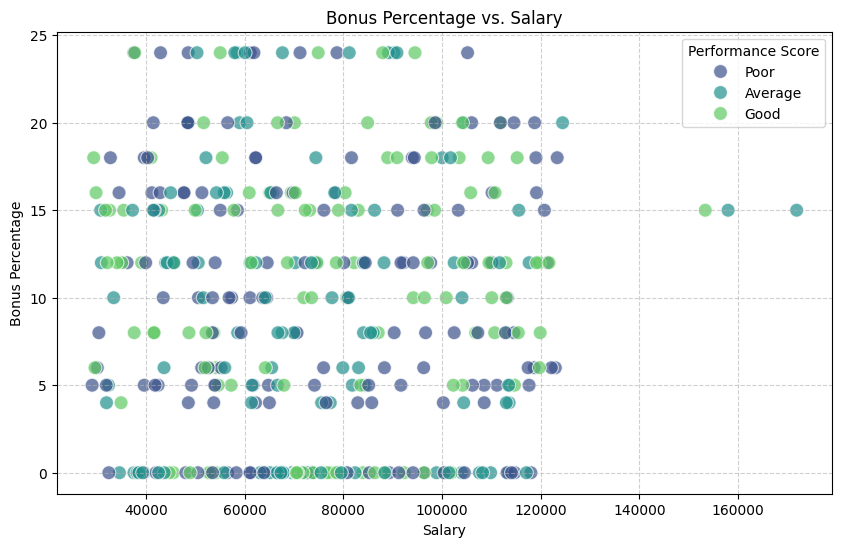

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='salary', y='bonus_pct', hue='perfomance_score', palette='viridis', s=100, alpha=0.7)
plt.title('Bonus Percentage vs. Salary')
plt.xlabel('Salary')
plt.ylabel('Bonus Percentage')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Performance Score')
plt.show()

**Reasoning**:
The next step is to examine the relationship between `bonus_pct` and `dept`. A box plot is a suitable visualization to show the distribution of bonus percentage across different departments.



/tmp/ipython-input-283/3943935003.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dept', y='bonus_pct', palette='pastel')


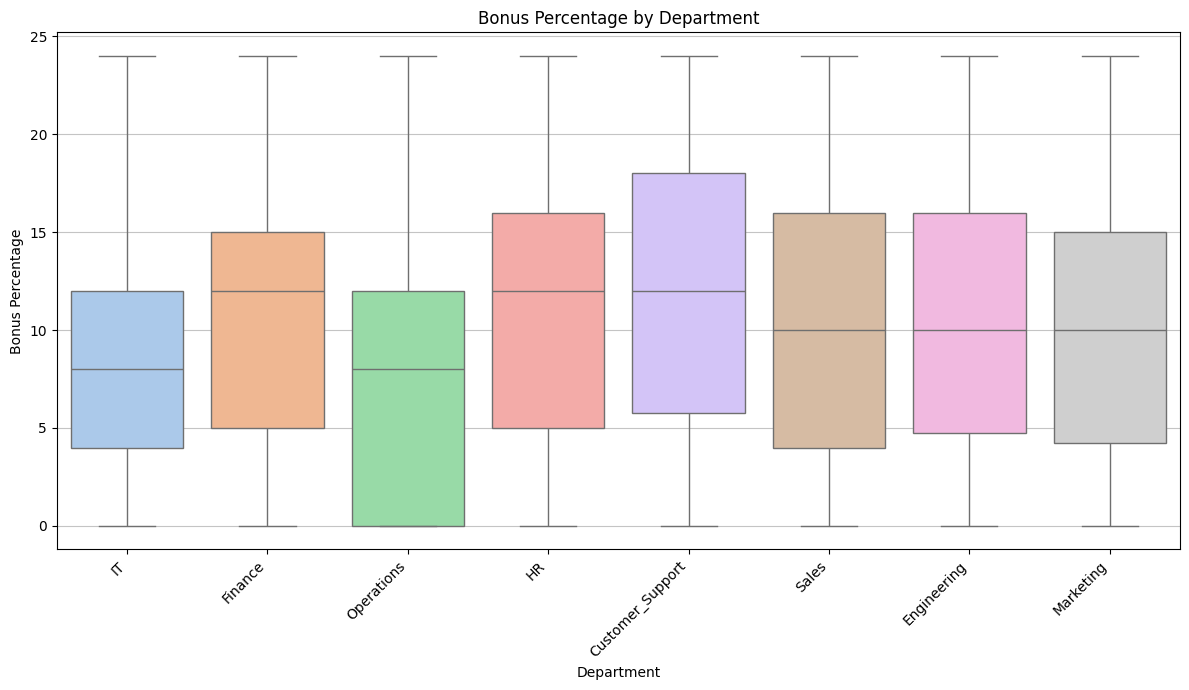

In [25]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='dept', y='bonus_pct', palette='pastel')
plt.title('Bonus Percentage by Department')
plt.xlabel('Department')
plt.ylabel('Bonus Percentage')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code produced a FutureWarning regarding the use of `palette` without `hue`. To address this, I will explicitly set `hue='dept'` and `legend=False` in the `sns.boxplot` function.



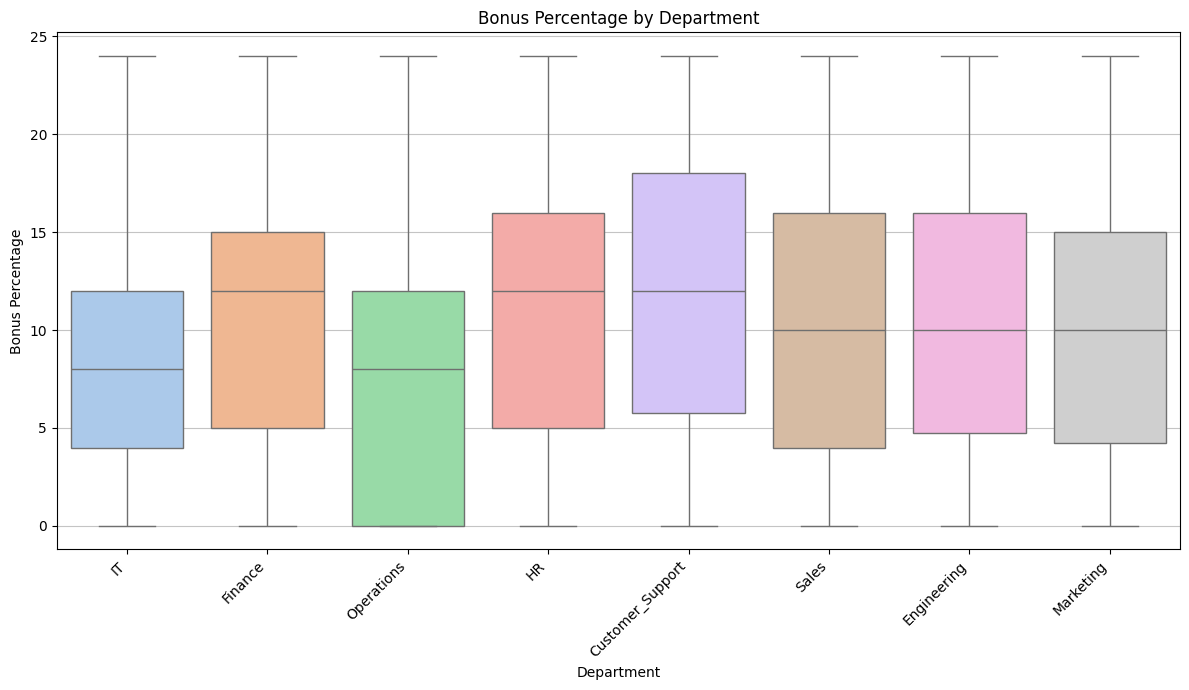

In [26]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='dept', y='bonus_pct', hue='dept', palette='pastel', legend=False)
plt.title('Bonus Percentage by Department')
plt.xlabel('Department')
plt.ylabel('Bonus Percentage')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Reasoning**:
The next step is to examine the relationship between `bonus_pct` and `job_title` to see if certain job titles receive different bonus percentages. A box plot is a suitable visualization for this comparison.



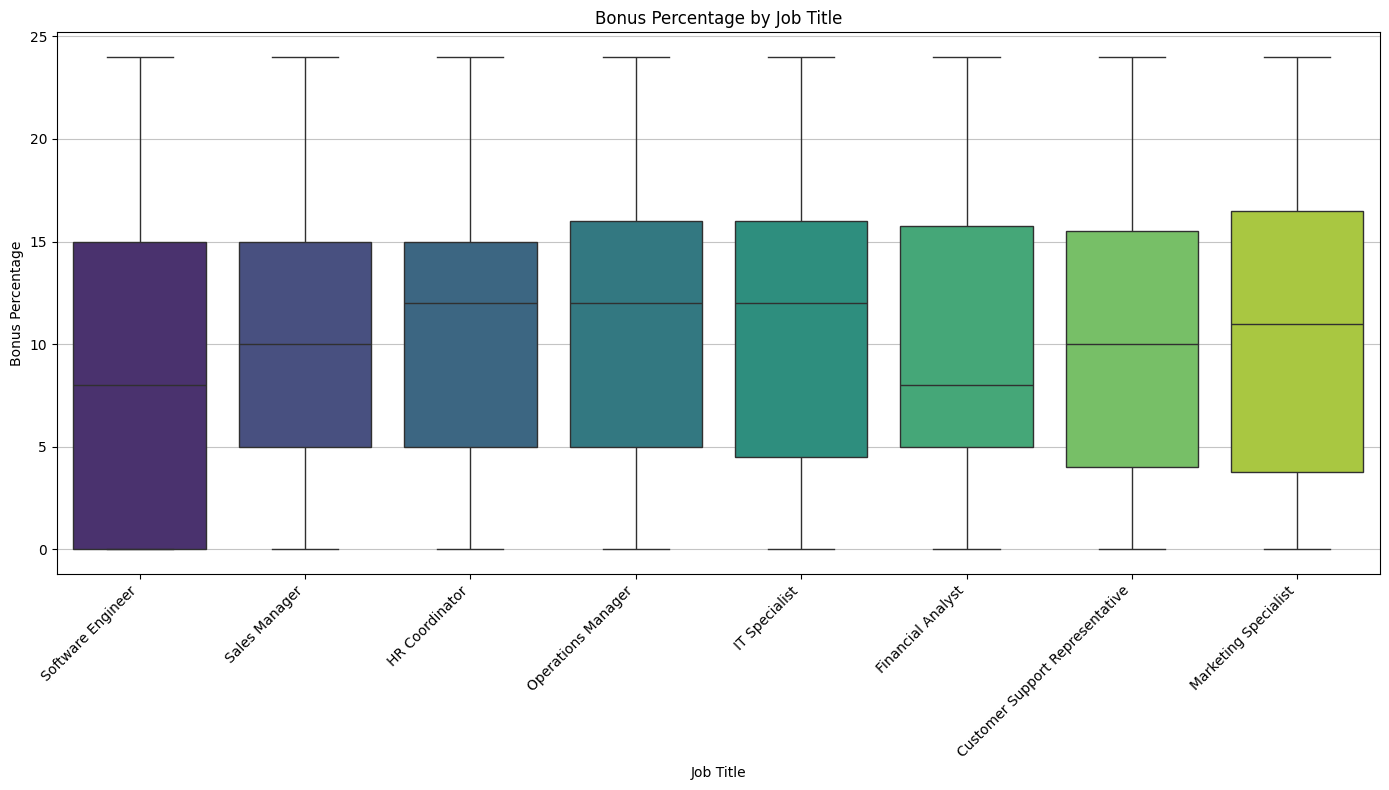

In [27]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='job_title', y='bonus_pct', hue='job_title', palette='viridis', legend=False)
plt.title('Bonus Percentage by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Bonus Percentage')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

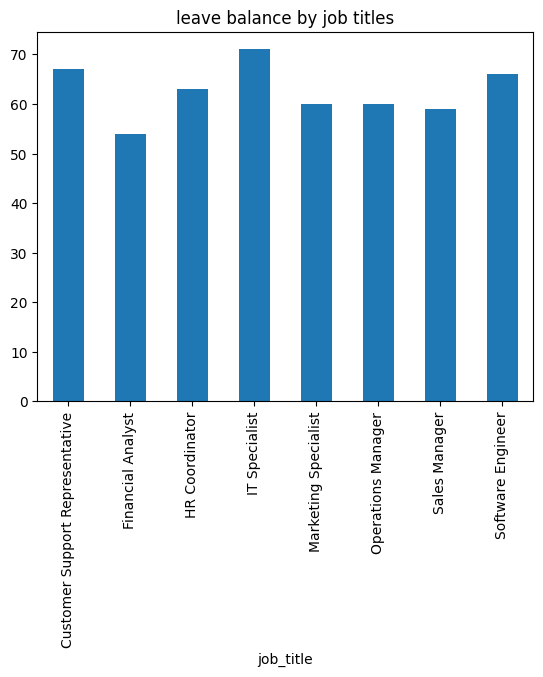

In [28]:
leave_by_job = (df.groupby('job_title')['leave_bal_days'].count())
plt.title('leave balance by job titles')
leave_by_job.plot(kind='bar')
plt.show()

<Axes: ylabel='count'>

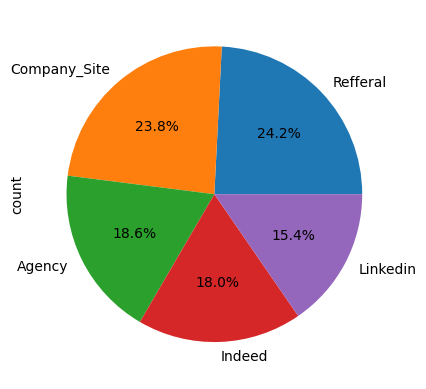

In [29]:
df['recruitment_source'].value_counts().plot(kind='pie', autopct='%0.1f%%')

In [30]:
df.head()

,hire_date,leave_bal_days,time2hire_dayz,last_perf_review,last_salary_bump,bonus_pct,emp_id,f_name,l_name,benefits_used,dept,recruitment_source,perfomance_score,salary,job_title
0,2023-05-27,0.0,29.7,2024-06-18,2022-07-02,0,1,Megan,Johnson,HlthIns,IT,Company_Site,Good,45567.00,Software Engineer
1,2022-04-01,0.0,41.4,2023-01-07,2023-09-06,20,2,Katherine,Bailey,Ret.Plan,Finance,Company_Site,Average,104385.00,Sales Manager
2,2021-11-21,24.0,19.0,2024-01-10,2023-08-03,18,3,Robert,Smith,Paid_Off,Operations,Linkedin,Good,103472.10,HR Coordinator
3,2021-08-10,0.0,16.0,2023-12-04,2022-11-05,4,4,Jonathan,Mccann,Paid_Off,IT,Company_Site,Average,77354.70,Operations Manager
4,2016-07-27,0.0,39.6,2024-08-09,2022-04-28,5,5,William,Fuentes,Gym Mem,HR,Company_Site,Poor,64821.75,IT Specialist


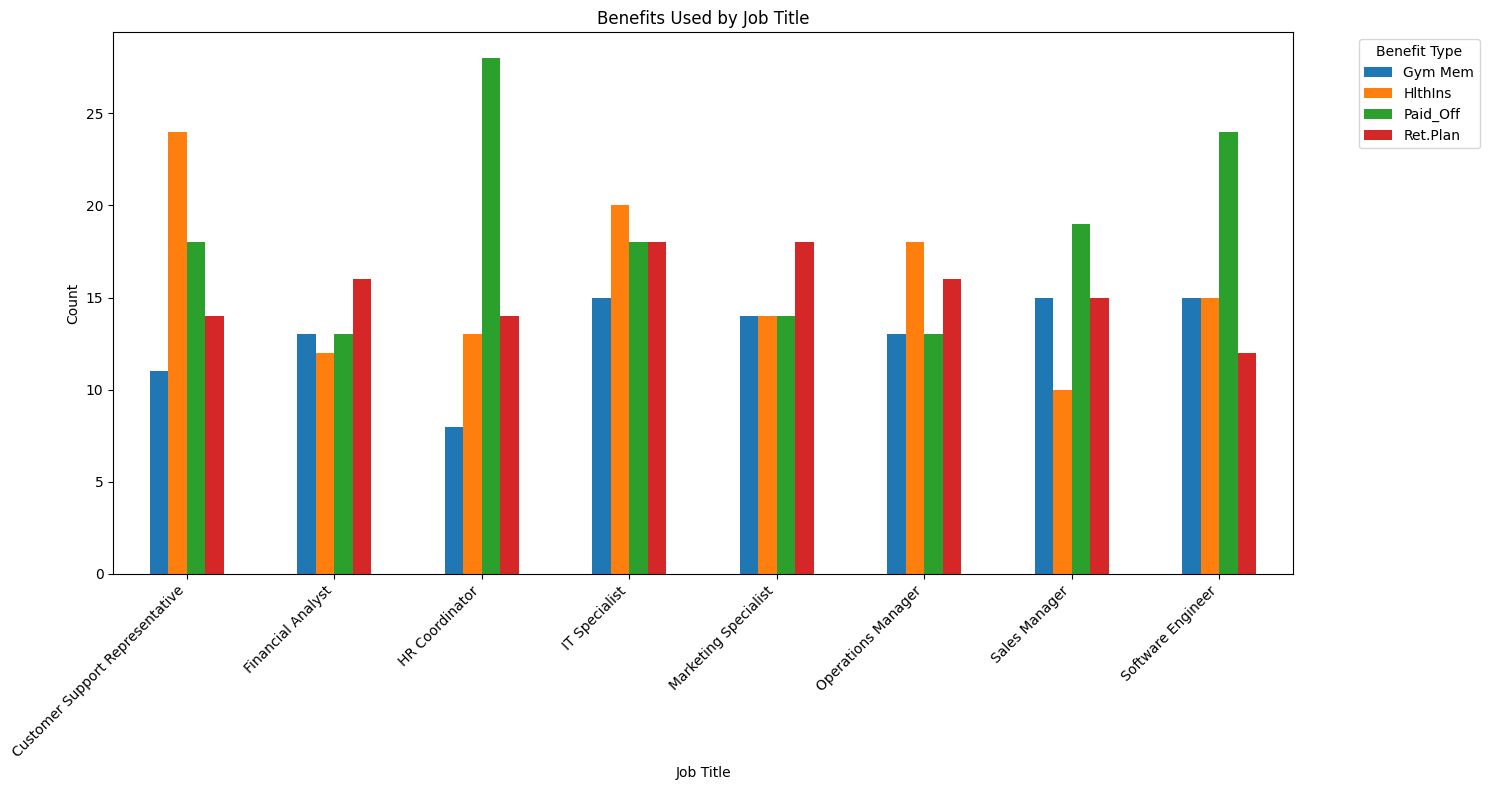

In [31]:
benefits_by_job = df.groupby('job_title')['benefits_used'].value_counts().unstack(fill_value=0)
plt.figure(figsize=(15, 8))
benefits_by_job.plot(kind='bar', ax=plt.gca())
plt.title('Benefits Used by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Benefit Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Comprehensive HR & Payroll EDA Report

This section provides a structured summary of the exploratory data analysis (EDA) performed on the HR & payroll dataset inside this notebook.

## 1. Dataset overview
- Shape (rows, columns)
- Column data types
- Sample records

## 2. Data quality checks
- Missing values by column
- Duplicate employee records
- Outliers in numerical columns (salary, bonus_pct, time2hire_dayz, leave_bal_days)

## 3. Univariate analysis
- Distribution of key numerical features: salary, bonus_pct, time2hire_dayz, leave_bal_days
- Frequency counts for departments, job titles, performance scores, benefits_used, recruitment_source

## 4. Bivariate analysis
- Salary distribution by department and job_title
- Salary vs performance_score
- Bonus percentage by department
- Time to hire vs recruitment source

## 5. HR & payroll insights
- Which departments are highest/lowest paid on average
- Which roles receive higher bonuses
- Relationship between tenure, performance, and salary
- Leave balance patterns across departments and performance bands

## 6. Data issues & cleaning
- Inconsistent categorical labels (e.g., IT vs I.T.)
- Potential typos in department and job titles
- Handling of missing leave_bal_days

## 7. Recommendations
- Standardize categorical fields (department, job_title, benefits_used, recruitment_source)
- Define data validation rules for new records
- Monitor key HR KPIs regularly: average salary by department, time-to-hire, bonus spend, leave utilization, and performance distribution.


## Additional EDA: Correlations & Group Statistics

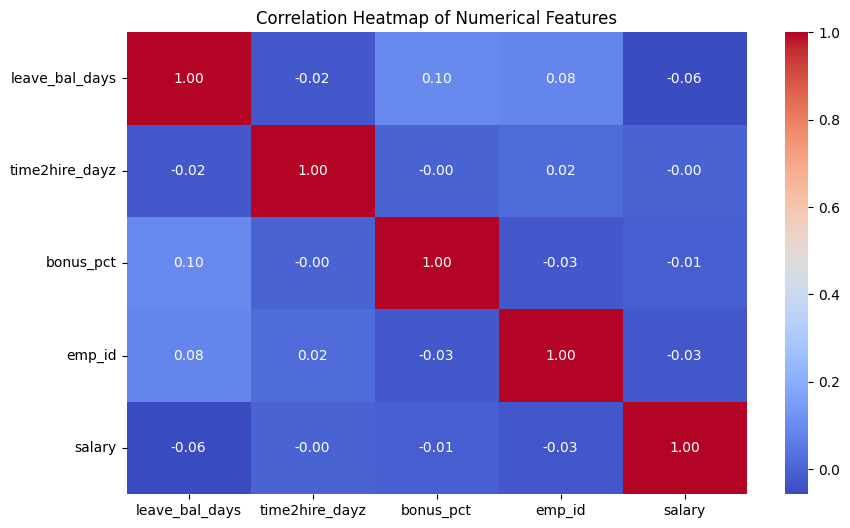

In [32]:
# Additional EDA: correlation heatmap for numerical features
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [35]:
# Additional EDA: group statistics by department and job title

# Average salary and bonus by department
dept_stats = df.groupby('dept')[['salary', 'bonus_pct']].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()
print('Department-level salary & bonus statistics:')
print(dept_stats)

# Average salary by job title
job_stats = df.groupby('job_title')['salary'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()
print('\nJob-title level salary statistics:')
print(job_stats.head(20))

Department-level salary & bonus statistics:
               dept        salary                                         \
                             mean     median       min         max count   
0  Customer_Support  73711.580078  70855.500  29094.70  157968.375    64   
1       Engineering  77469.406731  76337.275  30145.40  153342.000    52   
2           Finance  76789.445455  76880.000  30959.55  121327.500    55   
3                HR  74426.507377  69805.050  34959.05  122623.200    61   
4                IT  73370.958904  71573.950  30827.50  122960.250    73   
5         Marketing  74007.060500  73548.675  29411.05  120155.700    50   
6        Operations  76327.115530  74322.175  29664.70  124158.300    66   
7             Sales  78187.208544  75596.000  31964.00  171867.150    79   

   bonus_pct                       
        mean median min max count  
0  11.828125   12.0   0  24    64  
1   9.865385   10.0   0  24    52  
2  10.163636   12.0   0  24    55  
3  10.967213   

In [34]:
# Additional EDA: pivot tables for HR insights

# Pivot: average salary by department and performance score
pivot_salary_perf = df.pivot_table(values='salary', index='dept', columns='perfomance_score', aggfunc='mean')
print('Average salary by department and performance score:')
print(pivot_salary_perf)

# Pivot: average leave balance by department and performance score
pivot_leave_perf = df.pivot_table(values='leave_bal_days', index='dept', columns='perfomance_score', aggfunc='mean')
print('\nAverage leave balance (days) by department and performance score:')
print(pivot_leave_perf)

Average salary by department and performance score:
perfomance_score          Poor       Average          Good
dept                                                      
Customer_Support  72432.441176  77696.605769  76128.581250
Engineering       78973.846875  65593.378571  76894.192857
Finance           66722.852941  74179.686111  85789.013636
HR                77773.335714  67783.657692  79227.210000
IT                76763.993182  74349.860526  73536.177273
Marketing         74626.371667  64592.045000  74375.107143
Operations        81259.180556  80619.127500  60265.758333
Sales             72212.505208  80032.936111  83423.769048

Average leave balance (days) by department and performance score:
perfomance_score       Poor    Average       Good
dept                                             
Customer_Support   7.411765  10.076923   7.291667
Engineering        4.187500  12.285714   6.428571
Finance           11.117647   3.611111   4.818182
HR                 7.380952  13.384615  1

/tmp/ipython-input-283/1522411068.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_salary_perf = df.pivot_table(values='salary', index='dept', columns='perfomance_score', aggfunc='mean')
/tmp/ipython-input-283/1522411068.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_leave_perf = df.pivot_table(values='leave_bal_days', index='dept', columns='perfomance_score', aggfunc='mean')
